In [1]:
import pandas as pd
import os

# Define the selected attributes
selected_attributes = [
    'tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 'http.content_length',
    'dns.qry.type', 'tcp.connection.syn', 'tcp.flags.ack', 'udp.time_delta',
    'http.request.method', 'Attack_type'
]

# Dynamic file loading
attack_types = {
    'HTTP': 'DDoS_HTTP_Flood_attack.csv',
    'ICMP': 'DDoS_ICMP_Flood_attack.csv',
    'TCP_SYN': 'DDoS_TCP_SYN_Flood_attack.csv',
    'UDP': 'DDoS_UDP_Flood_attack.csv',
    'Password_Attack': 'Password_attack.csv',
}

df_list = []
for attack, filename in attack_types.items():
    file_path = os.path.join('Edge-IIoTset dataset', 'Attack traffic', filename)
    
    # Check if the file exists before loading
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path, usecols=selected_attributes, low_memory=False)
        df_temp['Attack_type'] = attack
        df_list.append(df_temp)
    else:
        print(f"File not found: {file_path}")

# Concatenate all dataframes
# if df_list:
#     df = pd.concat(df_list, ignore_index=True)
#     print("Data loaded successfully!")
# else:
#     print("No files were loaded. Check file paths or attribute names.")


In [2]:
selected_attributes = [
    'tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 'http.content_length',
    'dns.qry.type', 'tcp.connection.syn', 'tcp.flags.ack', 'udp.time_delta',
    'http.request.method', 'Attack_type'
]

# Base folder where normal traffic data is stored
base_folder = os.path.join('Edge-IIoTset dataset', 'Normal traffic')

# List of folders to load
folders = [
    'Flame_Sensor', 'Distance', 'Heart_Rate', 'IR_Receiver', 'Modbus',
    'Soil_Moisture', 'Sound_Sensor', 'Temperature_and_Humidity',
    'Water_Level', 'phValue'
]



# Loop through each folder and load the respective CSV
for folder in folders:
    file_path = os.path.join(base_folder, folder, f'{folder}.csv')
    
    # Check if the file exists before loading
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path, usecols=selected_attributes, low_memory=False)
        df_temp['Attack_type'] = 'Normal'  # Mark as normal traffic
       
        df_list.append(df_temp)
    else:
        print(f"File not found: {file_path}")

# Concatenate all dataframes
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("Normal traffic data loaded successfully!")
else:
    print("No files were loaded. Check file paths or attribute names.")

Normal traffic data loaded successfully!


C:\Users\rushi\AppData\Local\Temp\ipykernel_22500\3134122938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack_type', palette='Set2')


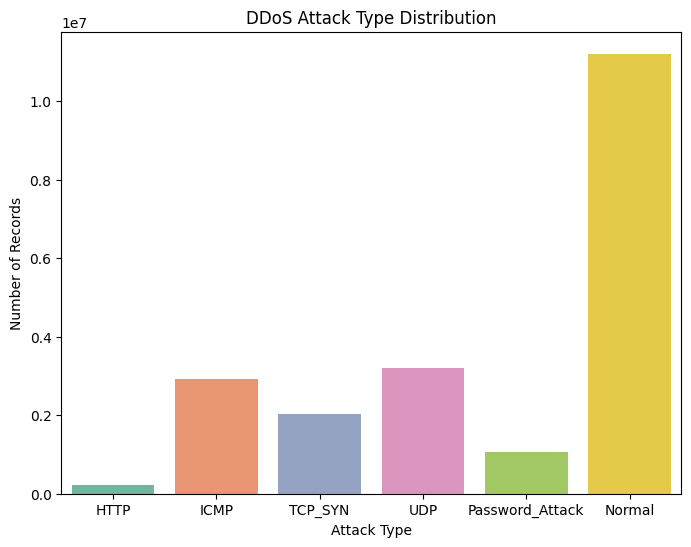

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Attack_type', palette='Set2')
plt.title('DDoS Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Number of Records')
plt.show()

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628420 entries, 0 to 20628419
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   http.content_length  float64
 1   http.request.method  object 
 2   tcp.connection.syn   float64
 3   tcp.dstport          object 
 4   tcp.flags.ack        float64
 5   tcp.len              object 
 6   tcp.srcport          float64
 7   udp.port             float64
 8   udp.time_delta       float64
 9   dns.qry.type         float64
 10  Attack_type          object 
dtypes: float64(7), object(4)
memory usage: 1.7+ GB


,http.content_length,tcp.connection.syn,tcp.flags.ack,tcp.srcport,udp.port,udp.time_delta,dns.qry.type
count,2.062842e+07,2.062842e+07,2.062842e+07,2.062842e+07,2.062842e+07,2.062842e+07,2.062842e+07
mean,3.392152e+00,9.700360e-02,1.000043e+00,2.417426e+04,5.908987e+00,5.463011e-02,2.224019e-03
std,6.899651e+01,2.959627e-01,2.191989e+01,2.594982e+04,5.370082e+02,3.086568e+01,2.461773e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.883000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,4.185000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00,5.311700e+04,0.000000e+00,0.000000e+00,0.000000e+00
max,1.465000e+03,1.000000e+00,1.460000e+03,6.553500e+04,6.389400e+04,5.257000e+04,3.700000e+01


In [5]:
df['tcp.len']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
            ... 
20628415    14.0
20628416     0.0
20628417     4.0
20628418     0.0
20628419     0.0
Name: tcp.len, Length: 20628420, dtype: object

In [6]:
# Identify non-numeric values
df = df[df['tcp.len'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]




In [7]:
df = df[df['tcp.dstport'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]


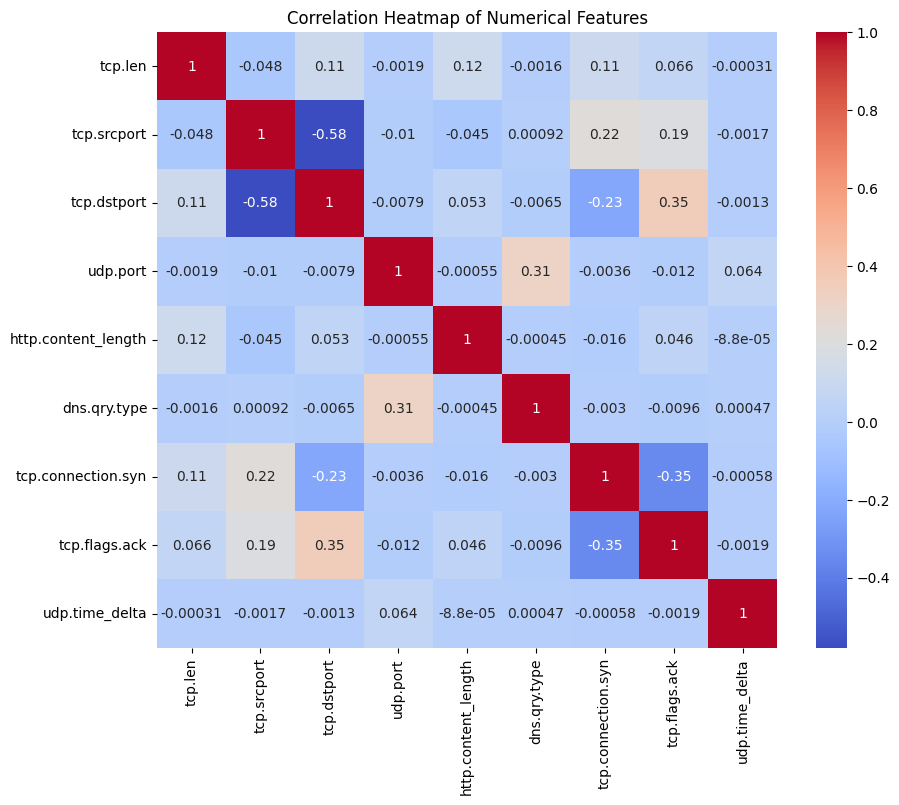

In [9]:
numeric_features = ['tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 
                    'http.content_length', 'dns.qry.type', 'tcp.connection.syn',
                    'tcp.flags.ack', 'udp.time_delta']




corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack_type', y='tcp.len', palette='Set3')
plt.title('TCP Packet Length Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('TCP Packet Length')
plt.show()

C:\Users\rushi\AppData\Local\Temp\ipykernel_22500\4234911089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attack_type', y='tcp.len', palette='Set3')


In [ ]:
# Define upper and lower limits for outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [ ]:


# Apply outlier removal on 'tcp.len'
df_before = df.shape[0]
df = remove_outliers_iqr(df, 'tcp.len')
df_after = df.shape[0]
print(f"Removed {df_before - df_after} outliers from 'tcp.len'")

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

In [ ]:
df.info()

In [ ]:
df = pd.get_dummies(df, columns=['http.request.method_0'], drop_first=True)
df = pd.get_dummies(df, columns=['http.request.method_GE'], drop_first=True)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding binary indicators)
numerical_features = ['tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 
                      'http.content_length', 'dns.qry.type', 'tcp.connection.syn', 
                      'tcp.flags.ack', 'udp.time_delta']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled features
print(df[numerical_features].head())

In [ ]:
sample_size = 25000  # Adjust as needed

# Handle Class Imbalance
from sklearn.utils import resample

# Separate each class
df_classes = {}
class_counts = df['Attack_type'].value_counts()
for attack_type in class_counts.index:
    df_classes[attack_type] = df[df['Attack_type'] == attack_type]

# Downsample each class to the defined sample size
df_downsampled = []
for attack_type, df_subset in df_classes.items():
    df_downsampled.append(resample(df_subset, 
                                   replace=False,    
                                   n_samples=sample_size,
                                   random_state=42))
    
# Combine downsampled data
df_balanced = pd.concat(df_downsampled)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check balanced distribution
print("Balanced Attack type distribution:")
print(df_balanced['Attack_type'].value_counts())

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_balanced = df_balanced.drop('Attack_type', axis=1)
y_balanced = df_balanced['Attack_type']

# Encode target labels
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)

# Check
print(f"Features shape: {X_balanced.shape}")
print(f"Target shape: {y_balanced_encoded.shape}")
print(f"Encoded target classes: {label_encoder.classes_}")

In [ ]:
y_balanced

In [ ]:
y_balanced_encoded 

In [ ]:


# Check unique values as a pandas Series
unique_values = pd.Series(y_balanced_encoded).unique()
print(f"Unique encoded values: {unique_values}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42, stratify=y_balanced_encoded
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees
    'max_depth': [10, 20, 30],                      # Max depth of trees
    'min_samples_split': [2, 5, 10],                # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Min samples required in a leaf
    'criterion': ['gini', 'entropy']                # Splitting criterion
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                  # 3-fold cross-validation
    n_jobs=-1,             # Use all available processors
    verbose=2,             # Show detailed progress
    scoring='accuracy'     # Optimize for accuracy
)

# Fit model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
# Use best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Train on full training data
best_rf.fit(X_train, y_train)


In [ ]:
# Make predictions on test data
y_predRF = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predRF)
print(f"Accuracy after Hyperparameter Tuning: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_predRF))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predRF))


In [ ]:
# Check feature importance for best model
feature_importances = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Importance': best_rf.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))  # Top 10 most important features


In [ ]:
y_predRF_decoded = label_encoder.inverse_transform(y_predRF)

# Decode actual test labels (for comparison)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Check a few decoded predictions
print("Predicted Attack Types:", y_predRF_decoded[:10])
print("Actual Attack Types:", y_test_decoded[:10])

In [ ]:


# Decode predictions and actual labels to original attack names
y_predRF_decoded = label_encoder.inverse_transform(y_predRF)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_predRF_decoded)

# Plot heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,  # X-axis labels
            yticklabels=label_encoder.classes_)  # Y-axis labels

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Attack Labels')
plt.show()


In [ ]:
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],             # Number of trees
    'max_depth': [3, 5, 7],                      # Max depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],           # Step size at each iteration
    'subsample': [0.8, 1.0],                     # Percentage of samples used per tree
    'colsample_bytree': [0.8, 1.0],              # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                      # Minimum loss reduction
    'reg_alpha': [0, 0.1, 1],                    # L1 regularization
    'reg_lambda': [1, 1.5, 2]                    # L2 regularization
}


In [ ]:
# Initialize XGBoost classifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Perform Grid Search with Cross Validation
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,                # 3-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=2,           # Show progress during the search
    scoring='accuracy'   # Optimize for accuracy
)

# Fit GridSearchCV on PCA-transformed data
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search_xgb.best_params_}")


In [ ]:
# Get the best model after grid search
best_xgb = grid_search_xgb.best_estimator_

# Predictions on test data
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate model performance
print("XGBoost with  Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost + Hyperparameter Tuning)')
plt.show()
